## Name: Abhinav Kumar Gaur
##### Semester: 6th
##### University Roll NO. 2013211
##### Section: A
##### Project No: 17

# Recommendation System

A recommendation system is a filteration program whose primary goal is to predict the "rating" or "prefrences" of 
a user towards a domain specific item or item. 
A recommendation system provides suggestions to the users through a filtering process that is based on user preferences and browsing history.recommendation system is a platform that provides its users with various contents based on their preferences and likings. A recommendation system takes the information about the user as an input.
Our main focus is to filter and predict only those items which  a user would prefer given some data about the user him or herself .

## Filtering stategies 

There are two type of filtering Stategies.
1. content Based filtering 
2. collaborative filtering

###  1.content Based filtering 

This filtration strategy based on the data provided about the items. the algorithm recommends products are similar to that ones that are a user liked in past.this similarity(cosine similarity or vector similarity ) is computed from data we have about the items as well as the user's past preferences.

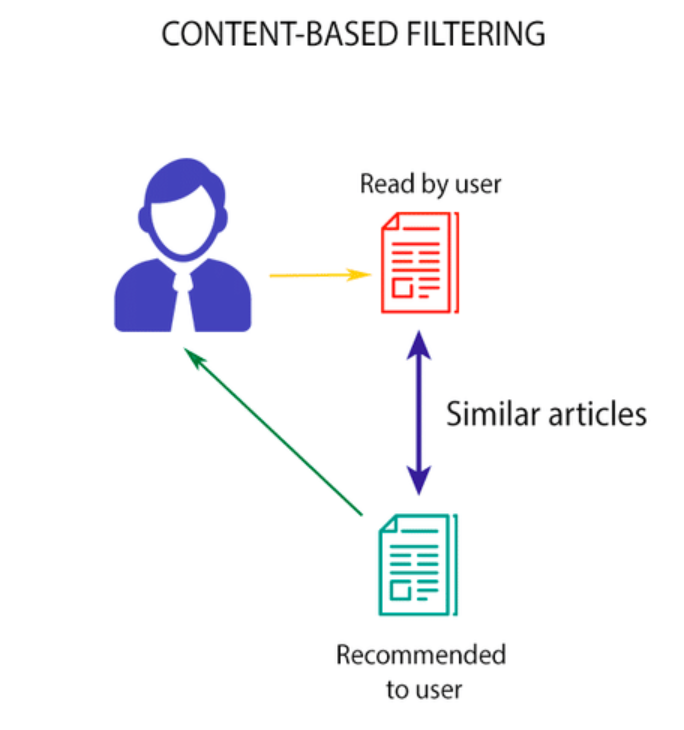

In [8]:
from IPython.display import Image
Image(filename='contentbased.png',width=250, height=100)

Disadvanges:
 

1. Different products do not get much exposure to the user.
    

2. Businesses cannot be expanded as the user does not try different types od items.

### 2.collaborative filtering

This filtration strategy is based on the combination of the user’s behavior and comparing and contrasting that with other users’ behavior in the database. The history of all users plays an important role in this algorithm. The main difference between content-based filtering and collaborative filtering that in the latter, the interaction of all users with the items influences the recommendation algorithm while for content-based filtering only the concerned user’s data is taken into account.

There are 2 types of collaborative filtering algorithms:

1. User-based Collaborative filtering : 
The basic idea here is to find users that have similar past preference patterns as the user ‘A’ has had and then recommending him or her items liked by those similar users which ‘A’ has not encountered yet. This is achieved by making a matrix of items each user has rated/viewed/liked/clicked depending upon the task at hand, and then computing the similarity score between the users and finally recommending items that the concerned user isn’t aware of but users similar to him/her are and liked it.


2. Item-based Collaborative Filtering: 
The concept in this case is to find similar movies instead of similar users and then recommending similar movies to that ‘A’ has had in his/her past preferences. This is executed by finding every pair of items that were rated/viewed/liked/clicked by the same user, then measuring the similarity of those rated/viewed/liked/clicked across all user who rated/viewed/liked/clicked both, and finally recommending them based on similarity scores.


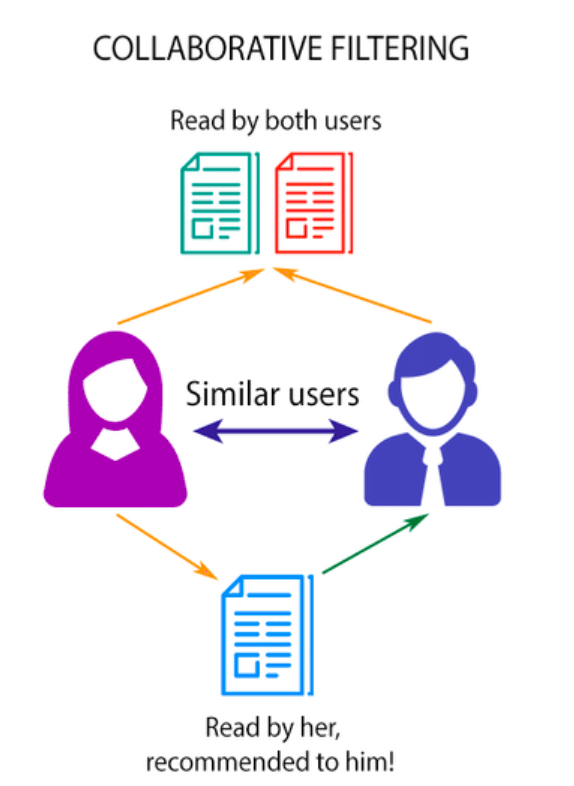

In [9]:
from IPython.display import Image
Image(filename='colloborative.png',width=250, height=100)

## Peparing Data for checking similarities.

## Pre-processing Pipeline

1.Tokenisation:

A document is made of tokens of arbitrary length. It is the splitting of the text into smaller units where each unit is called a token. Tokens can be phrases, words, syllables or characters. The most common splitting used is splitting into tokens of words.

2.Annotation (Part of Speech):

Annotation or POS tagging, tags each word with their grammatical function, thus making it easier for the algorithm to recognize a word such as ‘saw’ as either a verb (past tense of the word see) or noun (tool for cutting wood), according to the context.

3.Word standardisation:

Words are modified to express different grammatical meanings while using it. But whenever the machine comes across the words see and saw or cat and cats, it should be able to map it to the same token and meaning. For this purpose there are two ways to solve it;

A.Lemmatisation: Each term is brought down to its dictionary meaning. So, the words ‘Cat’, ‘CAT’, ‘cat’, ‘cats’ all correspond to the word ‘cat’. Similarly, words ‘see’, ‘saw’ will be brought to its dictionary form ‘see’. This method could be slower but produces more consistent content. It makes use of pos tagging.
B.Stemming: Each term is brought down to its word stem. This method is much faster and robust. So words like ‘singing’, ‘singer’ all stem to ‘sing’.

4.Filtering:

The removal of unnecessary words that are deemed as noise and stopwords. Words such as ‘a’, ‘an’ etc. don’t add much weight to the meaning of the sentence and are filtered out. Stopword removal also includes removing words according to the frequency of the word. Words that appear very frequently in a document as well as those that just appear once or twice in a document are not really discriminative in nature. They don’t contribute to the meaning of the document and are hence filtered out.

Filtering is of many types but most commonly used one are:

##### a.Bag of Words Model

Machines cannot understand words or variable sized inputs like we humans can. They need the text to be broken down into a numerical format for processing. Hence, after pre-processing, the corpus (large document text) is flattened into a fixed-size vector i.e. a bag of words model. A bag-of-words representation of text discards the order or structure of the words in the text, and is only concerned with two things; the vocabulary of known words and the measure of the presence of these known words.
Consider three documents d1: “He is a good boy.”, d2: “She is a good girl.” and d3: “There is a good boy and girl”
Vocabulary (terms) : good, boy , girl.

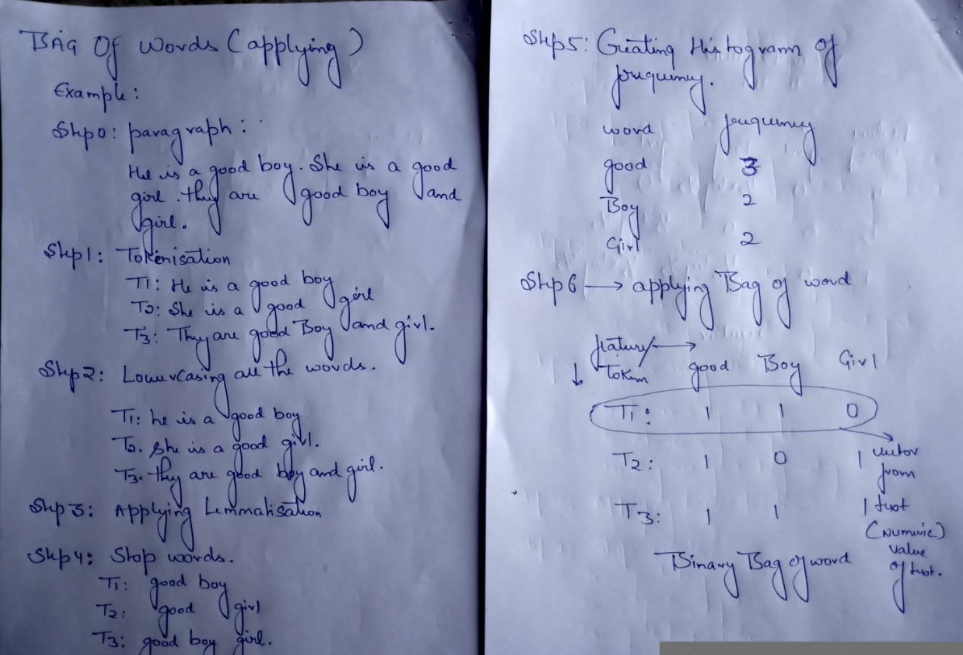

In [56]:
from IPython.display import Image
Image(filename='bagofwords.png',width=700, height=600)

##### b.Tf-Idf

TF-IDF Weighting (Term frequency-Inverse Document frequency) 

Using raw frequency to weigh words has problems. Large documents become very far from short documents, even though they may be very similar in content. Hence, weighting functions such as the TF-IDF are applied to words. Term frequency-inverse document frequency, is a statistic that reflects how important a word is to a document in a collection or corpus.
Term Frequency (TF) is the measure of the number of times a term occurs in a particular document.

TF = (Number of times a term t occurs in a document)/(Number of terms in the document)

Inverse-Document Frequency (IDF) is a measure of how important a term is or a measure of how rare a term is across documents. The IDF of a rare term is likely to be high and the IDF of a frequent term is likely to be low.

IDF = log(N/n); where N is the number of documents and n is the number of documents containing the term t.

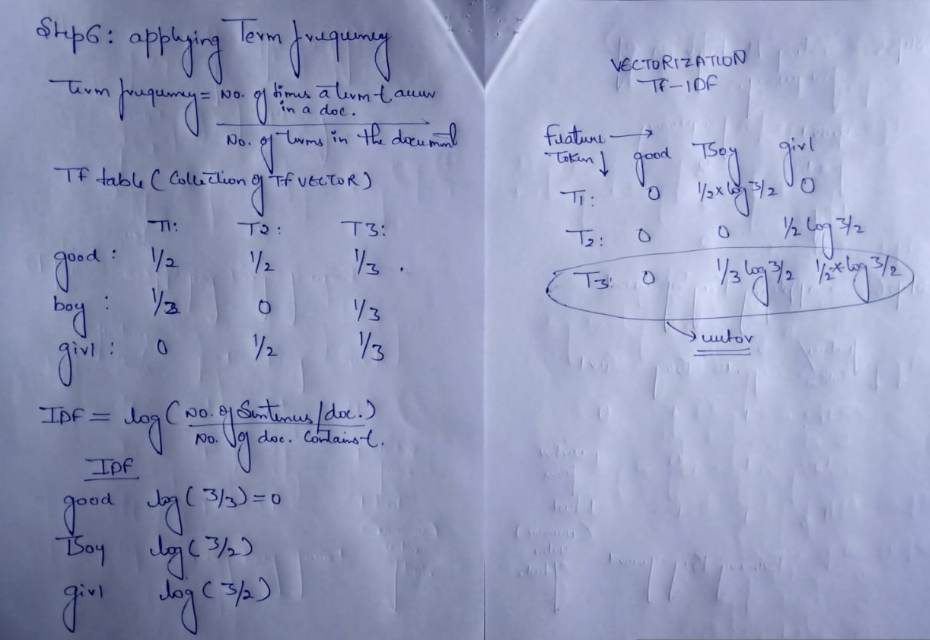

In [57]:
from IPython.display import Image
Image(filename='tfidf.png',width=700, height=600)

### Comparision of vectors

Cosine Similarity

Similarity is a metric to measure how similar two document vectors are, irrespective of their size. It is at the core of many algorithms such as information retrieval, recommender systems etc. Intrinsically it is related to distance measures between two documents.
Cosine Similarity is a common similarity measure which measures the cosine of the angle between the two document vectors d1 and d2 in a multi-dimensional space. The dot product of the two vectors is divided by the multiplication of their norms.

Cosine Similarity (d1, d2) = ( |d1 . d2| ) / ( ||d1|| * ||d2|| )

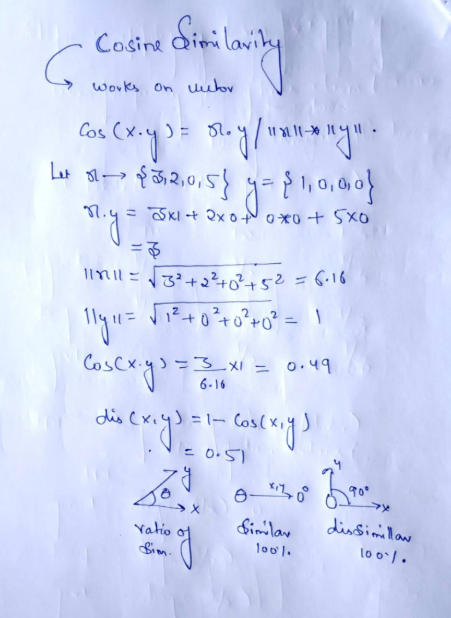

In [60]:
from IPython.display import Image
Image(filename='cosine.png',width=400, height=300)

# Movie Recommendation 

Importing required libraries 

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys 
import pickle

Adding movielens Dataset using pandas.

In [18]:
movies = pd.read_csv('movie.csv')
tags = pd.read_csv('tag.csv')
ratings = pd.read_csv('rating1.csv')

C:\Users\Abhinav\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


showing Head dataset's data.

In [15]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


showing Tags dataset's data.

In [17]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


showing ratings dataset's data.

In [37]:
ratings.head()

,userId,movieId,rating,timestamp
0,1.0,2.0,3.5,02-04-2005 23:53
1,1.0,29.0,3.5,02-04-2005 23:31
2,1.0,32.0,3.5,02-04-2005 23:33
3,1.0,47.0,3.5,02-04-2005 23:32
4,1.0,50.0,3.5,02-04-2005 23:29


Removing '|' from 'genres' feature of movies dataset

In [38]:
movies['genres'] = movies['genres'].str.replace('|',' ')

unique movies and ratings count 

In [39]:
len(movies.movieId.unique())

27278

In [40]:
len(ratings.movieId.unique())

13609

Limit rating to user ratings that have rated more than 55 movies
otherwise it become impossible to pivot the rating dataframe for collaborative filtering.
It help us to get quality data and help in developing good system.

In [19]:
ratings_f = ratings.groupby('userId').filter(lambda x : len(x) >= 55)

#list of movie title that survive the filtering

movie_list_rating = ratings_f.movieId.unique().tolist()

In [20]:
# we have kept approx 50% of the original movies title inratng data frame
len(ratings_f.movieId.unique())/len(movies.movieId.unique()) *100

49.53442334482

In [21]:
#but only 58% of the user  
len(ratings_f.userId.unique())/len(ratings.userId.unique()) *100

58.80814496543994

In [22]:
# filter the movies data frame(subset of data)
movies = movies[movies.movieId.isin(movie_list_rating)]

In [23]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
#map movie to id:
mapping_file = dict(zip(movies.title.tolist(), movies.movieId.tolist()))

In [47]:
tags.drop(['timestamp'],1,inplace= True)
ratings_f.drop(['timestamp'],1,inplace= True)

###### merging the movies and the tags data frame and create a metadata tag for each movie (for content based filtering):

In [26]:
# create a mixed dataframes of movies title, genres
# and all user tags given to each movie.
# merging and identify by movie id .
mixed = pd.merge(movies , tags , on='movieId',how ='left')
mixed.head(3)

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644.0,Watched,2014-12-04 23:44:40
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,computer animation,2007-07-08 13:59:15
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,Disney animated feature,2007-07-08 22:21:47


In [28]:
#create metadata from tags and genres 
# we have to filter or classify using tags and genres so we create a single line metadata .
mixed.fillna("", inplace = True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply( lambda x: "%s" % ' '.join(x)))
final = pd.merge(movies , mixed , on ='movieId', how ='left')
final['metadata'] = final[['tag','genres']].apply(lambda x : ' '.join(x), axis =1 )
final[['movieId','title','metadata']].head(3)
#genrating final dataframe.

,movieId,title,metadata
0,1,Toy Story (1995),Watched computer animation Disney animated fea...
1,2,Jumanji (1995),time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),old people that is actually funny sequel fever...


In [29]:
final.shape

(13512, 5)

showing meta data for movieid 0

In [30]:
final.loc[0,"metadata"]

"Watched computer animation Disney animated feature Pixar animation TÃ©a Leoni does not star in this movie Pixar animation family Tom Hanks Pixar witty Pixar adventure animated animation clever comedy computer animation family fantasy Tom Hanks bright DARING RESCUES fanciful HEROIC MISSION humorous light rousing TOYS COME TO LIFE UNLIKELY FRIENDSHIPS warm witty animation humorous Pixar time travel Pixar Pixar animation animation kids movie Pixar Pixar Pixar witty Disney Tim Allen time travel action figure action figures Buzz Lightyear CG animation toy toys Woody animation Pixar animation Disney villian hurts toys pixar animation disney fantasy Pixar animation pixar children é˜®ä¸€é¸£ animation computer animation funny humorous Pixar Tom Hanks witty 3D Disney funny Pixar time travel Pixar time travel animation Pixar Cartoon Disney toy toys Pixar Pixar animation pixar animated animation comedy Disney Pixar ya boy clever computer animation Disney fantasy Pixar toys witty animation cgi rat

### creating a content latent matrix from movie metadata 

Tf-idf vectors and Truncated SVD

In [31]:
#importing tfidfvectorizer.(give more imp to rare words and less imp to frequent words).
from sklearn.feature_extraction.text import TfidfVectorizer
#applying stop word
tfidf = TfidfVectorizer(stop_words='english')
#making matrix of features
tfidf_matrix = tfidf.fit_transform(final['metadata'])
tfidf_df= pd.DataFrame(tfidf_matrix.toarray(),index=final.index.tolist())

In [32]:
print(tfidf_df.shape)

(13512, 21295)


In [34]:
#how dataframe look like for movies .
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21285,21286,21287,21288,21289,21290,21291,21292,21293,21294
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
tfidf_df.loc(0)

The first 200 components explain over 50% of varience:

In [36]:
# performing dimensions reduction of vector because we have long vectors.
from sklearn.decomposition import TruncatedSVD
#limiting to 200 components.
svd = TruncatedSVD(n_components = 200)
#fitting..
latent_matrix = svd.fit_transform(tfidf_df)
# explained = svd.explained_varience_ratio.cunsum()

In [37]:
n=200
#number of letent dimensions to keep .
latent_matrix_l_df = pd.DataFrame(latent_matrix[:,0:n],index=final.title.tolist())
latent_matrix.shape

(13512, 200)

In [40]:
#our content latent matrix:
latent_matrix.shape
#now we have small vector of 200 features only for a movie .

(13512, 200)

Till now we have content vector of each movie.

#### Creating a colloborative latent matrix from user Rating:

we have ratings foe each user and movie for those user who rated more than 55 ratings

In [59]:
ratings_f.head()

,userId,movieId,rating
0,1.0,2.0,3.5
1,1.0,29.0,3.5
2,1.0,32.0,3.5
3,1.0,47.0,3.5
4,1.0,50.0,3.5


In [42]:
# merging dataset movie and rating to get for ever movie.
ratings_f1=pd.merge(movies[['movieId']],ratings_f,on="movieId",how="right")
#pivort the dataset.
ratings_f2 = ratings_f1.pivot(index = 'movieId', columns = 'userId', values ='rating').fillna(0)
# we have movieid vs user wise rating matrix.
ratings_f2.head(3)

userId,1.0,2.0,3.0,5.0,7.0,8.0,11.0,13.0,14.0,16.0,...,5337.0,5338.0,5340.0,5341.0,5342.0,5346.0,5347.0,5348.0,5350.0,5352.0
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,4.0,4.5,4.0,4.5,3.0,...,3.5,5.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,2.5
2,3.5,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,2.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1.5,2.0
3,0.0,4.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [43]:
ratings_f2.shape

(13512, 3148)

In [44]:
len(ratings_f.movieId.unique())

13512

In [45]:
# performing dimensions reduction of vector because we have long vectors.
from sklearn.decomposition import TruncatedSVD
#limiting to 200 components.
svd = TruncatedSVD(n_components = 200)
latent_matrix_2 = svd.fit_transform(ratings_f2)
latent_matrix_2_df=pd.DataFrame(latent_matrix_2,index=final.title.tolist())

In [64]:
latent_matrix_2_df.shape

(13512, 200)

In [66]:
latent_matrix_l_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),0.048655,0.054515,0.027389,-0.006518,0.067833,0.083618,-0.021187,0.130454,-0.009058,-0.047396,...,0.000392,0.012751,0.017477,-0.034827,0.025030,0.037758,-0.067937,-0.017617,-0.021216,-0.024452
Jumanji (1995),0.024291,0.010986,0.044723,0.002007,0.037822,0.072494,-0.003981,0.089086,-0.011436,-0.027433,...,-0.010023,-0.013637,0.008696,0.008723,-0.012727,0.017622,-0.020268,-0.005790,-0.004042,-0.015142
Grumpier Old Men (1995),0.061014,0.065755,-0.000602,0.009389,0.005679,0.022065,0.024684,-0.005944,-0.001466,-0.001171,...,0.001112,-0.004632,0.014514,0.023171,-0.004227,-0.000127,0.043820,-0.005275,-0.006588,0.004216
Waiting to Exhale (1995),0.169644,0.044606,-0.025022,0.035987,-0.006459,0.068136,0.088714,-0.035772,-0.005503,-0.011460,...,0.028688,-0.017077,0.042430,-0.071955,-0.085038,-0.028625,-0.036760,-0.039832,0.055551,0.033037
Father of the Bride Part II (1995),0.070181,0.082221,0.009964,-0.000787,0.016626,0.011374,-0.015768,0.025338,-0.001521,-0.002634,...,0.005083,0.017709,0.026829,0.029816,-0.038140,0.009862,0.005871,-0.014903,-0.017828,0.020515


In [67]:
latent_matrix_2_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),114.007390,-1.573990,26.136520,15.953648,5.843151,35.990086,-3.399555,7.665011,15.240833,0.025738,...,-7.375534,-1.689081,-1.283045,0.294769,-1.951993,1.220536,0.170378,-3.099939,2.295018,-4.576868
Jumanji (1995),53.023975,-0.054846,31.700414,-6.739358,-10.451463,5.997618,-10.925832,10.561201,-1.872638,3.706518,...,0.553630,-1.470510,-1.845997,1.746891,-4.926869,-1.821506,2.093282,-1.237904,3.895177,-3.147956
Grumpier Old Men (1995),23.355985,-8.717053,16.705118,-8.190293,-9.342945,0.178811,-0.305697,-0.404921,2.195800,3.993192,...,0.071233,-1.118090,-0.263863,-0.086550,-1.332452,2.105816,-0.916604,1.751020,-0.306110,-0.317533
Waiting to Exhale (1995),5.476817,-5.402270,4.627437,-1.751648,-4.668420,-1.349797,1.742444,1.029241,1.315193,-1.755668,...,0.917847,0.550271,1.363507,0.372641,-0.312493,0.010547,-1.038395,0.042906,-1.120293,0.449491
Father of the Bride Part II (1995),20.414781,-8.791025,21.007581,-9.035887,-12.250778,1.195477,-0.447868,0.468119,2.131197,1.604280,...,-0.963992,0.005023,0.702520,1.091172,1.815177,-0.065184,1.558161,-2.090900,-0.156358,1.234216


Till now we have two matrix latent matrix_1(movies vs content) latent_matrix_2(rating vs user)


### Running a content / collborative and hybrid cosine similarity:

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
#take the latent vectors for a slected movie from both contentand collaborative matrixes.
    # let we want toy story recommendation (1995).
#picking toy story matrix from both the matrix.
a_1 = np.array(latent_matrix_l_df.loc['Toy Story (1995)']).reshape(1,-1)
a_2 = np.array(latent_matrix_2_df.loc['Toy Story (1995)']).reshape(1,-1)

In [50]:
#calculate the similarity of this movie with the other in the list 
# comparing toy story's vector with other vectors.(with every other movie)
score_1=cosine_similarity(latent_matrix_l_df,a_1).reshape(-1)
score_2=cosine_similarity(latent_matrix_2_df,a_2).reshape(-1)

In [51]:
#an average measure of both content and collaborative
hybrid = ((score_1+score_2)/2.0)

In [52]:
#form a data frame of similar movies
dictDf = {'content':score_1,'colloborative':score_2,'hybrid':hybrid}
similar = pd.DataFrame(dictDf, index = latent_matrix_l_df.index)

In [80]:
#sorting based on hybrid 
similar.sort_values('hybrid',ascending =False , inplace = True)


In [81]:
similar[1:].head(11)

,content,colloborative,hybrid
Toy Story 2 (1999),0.966038,0.751993,0.859015
"Bug's Life, A (1998)",0.909306,0.669680,0.789493
"Monsters, Inc. (2001)",0.890918,0.626687,0.758803
Finding Nemo (2003),0.882317,0.605464,0.743890
Ice Age (2002),0.881194,0.474145,0.677669
"Incredibles, The (2004)",0.796920,0.557879,0.677400
Ratatouille (2007),0.898907,0.401276,0.650091
Antz (1998),0.751994,0.541300,0.646647
Toy Story 3 (2010),0.864853,0.379689,0.622271
Shrek (2001),0.574865,0.641949,0.608407


showing content based similar movies

In [83]:
similar.sort_values('content',ascending =False , inplace = True)
similar[1:].head(11)

,content,colloborative,hybrid
Toy Story 2 (1999),0.966038,0.751993,0.859015
"Bug's Life, A (1998)",0.909306,0.669680,0.789493
Ratatouille (2007),0.898907,0.401276,0.650091
"Monsters, Inc. (2001)",0.890918,0.626687,0.758803
Finding Nemo (2003),0.882317,0.605464,0.743890
Ice Age (2002),0.881194,0.474145,0.677669
Toy Story 3 (2010),0.864853,0.379689,0.622271
Monsters University (2013),0.820516,0.169262,0.494889
Tin Toy (1988),0.799957,0.053521,0.426739
Red's Dream (1987),0.797502,0.053521,0.425512


In [ ]:
colloborative based filttering below are the recommendations.

In [84]:
similar.sort_values('colloborative',ascending =False , inplace = True)
similar[1:].head(11)

,content,colloborative,hybrid
Toy Story 2 (1999),0.966038,0.751993,0.859015
Forrest Gump (1994),0.275978,0.699971,0.487975
Aladdin (1992),0.389957,0.697274,0.543616
Jurassic Park (1993),0.059816,0.696833,0.378324
Back to the Future (1985),0.150203,0.695755,0.422979
"Lion King, The (1994)",0.430952,0.690957,0.560954
Independence Day (a.k.a. ID4) (1996),0.005165,0.689500,0.347332
Star Wars: Episode IV - A New Hope (1977),0.028591,0.687976,0.358283
Star Wars: Episode VI - Return of the Jedi (1983),0.016794,0.673369,0.345082
Mission: Impossible (1996),0.239535,0.670785,0.455160
